In [43]:
import matplotlib.pyplot as plt
import torch
from glob import glob

from PIL import Image
import numpy as np

In [98]:
from datasets.styletransfer import StyleTransferDataset
from torch.utils.data import DataLoader
from torchvision import transforms

transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

valid_dataset = StyleTransferDataset(root="data/monet2photo/", limit=10, train=False, transform=transforms)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

In [99]:
from models.cycle_gan_resnet import CycleGANResNet
model = CycleGANResNet((3,256,256), (3,256,256), gen_n_filters=32, disc_n_filters=64, name='model', device='cpu', is_train=False, lr =0.2)

In [101]:
checkpoints = torch.load("logs/CYCLE-GAN-RESNET/expr_20251114_185214/CYCLE-GAN-RESNET_checkpoint_epoch_120_latest.pth", weights_only=False)

In [102]:
model.load_checkpoint(checkpoints["model"])

In [103]:
img = valid_dataset[0][0]
before = img.numpy().transpose(1,2,0)
after = model.G_ab(img.unsqueeze(0)).squeeze(0).detach().numpy().transpose(1,2,0)
after = after * 0.5 + 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


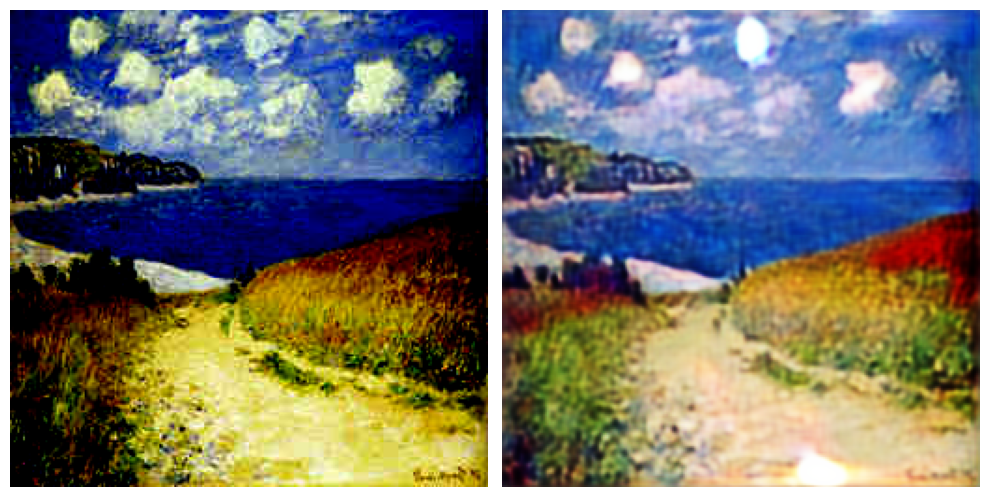

In [105]:
flg, axes = plt.subplots(1, 2, figsize=(10,20))
axes[0].imshow(before)
axes[0].axis('off')
axes[1].imshow(after)
axes[1].axis('off')
plt.tight_layout()
plt.show()